In [1]:
# Load dataset (Iris example)
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [2]:
# describe dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# set targets
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# DATA PRE-processing: missing data, class imbalance, feature encoding, normalization/standardization, Feature Engineering, etc...
# out of scope for this exercise
# 90% of ML is getting Data ready!

In [ ]:
# split train/test data
# 25% test, 75% train
# not tuning/optimizing hyper parameters, so no need for validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=16)
# shuffle = True
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Choose model class
from sklearn.linear_model import LogisticRegression

# instantiate the model
model_reg = LogisticRegression(random_state=16)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Train Model: model.fit()
# ML libraries are using standard methods
model_reg.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [8]:
# use Model to Predict: model.predict()
y_pred = model_reg.predict(X_test)

In [9]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.9210526315789473

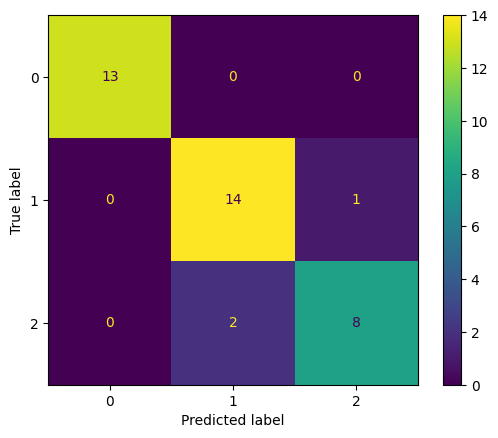

In [11]:
# plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_reg.classes_)
disp.plot()
plt.show()

In [ ]:
 # Keras example
# Sequential: linear stack of layers (simpler, less flexible)
# Model: Functional API for complex architectures (more complex, more flexible)
# Layer types
# - Dense: Fully connected layer
# - Conv2D: 2D convolution layer
# - MaxPooling2D: 2D pooling layer
# - Dropout: Dropout layer for regularization
# - Flatten: flattening layer
# - LSTM: Long Short-Term Memory layer

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.utils import to_categorical

2025-03-10 17:05:12.824067: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Normalize the data - NNs very sensitive to normalization
df = df/df.max(axis=0) # divide every column by max so they are in the same scale
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=16)

# change y into one hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
# build model
model = Sequential() # create sequential model
model.add(Dense(4, input_dim=4, activation='relu')) # add dense layer - first, how many dimensions in
model.add(Dense(100, activation='relu')) # add dense layer (more layers and more neurons, more capacity to learn)
model.add(Dropout(0.2)) # dropout about 20%
model.add(Dense(3, activation='softmax')) # add dense layer, how many dimensions out
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/Users/chrisecks/code/free-genai-bootcamp-2025/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# display results
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823 (3.21 KB)

 Trainable params: 823 (3.21 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# fit the Keras model on the dataset
# epochs is the number of training cycles, starts with randomized weights
history = model.fit(X_train, y_train, epochs=300, batch_size=10, validation_split=0.2, shuffle=True)

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3754 - loss: 1.0927 - val_accuracy: 0.2609 - val_loss: 1.0714
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3451 - loss: 1.1079 - val_accuracy: 0.5217 - val_loss: 1.0574
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5015 - loss: 1.0707 - val_accuracy: 0.5217 - val_loss: 1.0512
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3305 - loss: 1.0765 - val_accuracy: 0.5217 - val_loss: 1.0422
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3399 - loss: 1.0680 - val_accuracy: 0.5217 - val_loss: 1.0423
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5263 - loss: 1.0442 - val_accuracy: 0.6522 - val_loss: 1.0274
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6311 - loss: 1.0377 - val_accuracy: 0.7391 - val_loss: 1.0116
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6104 - loss: 1.0236 - val_accuracy: 0.7391 - val_loss:

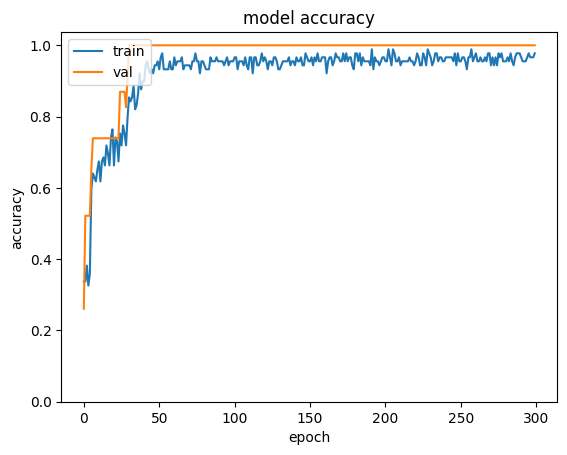

In [19]:
# Plot training curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(ymin=0)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

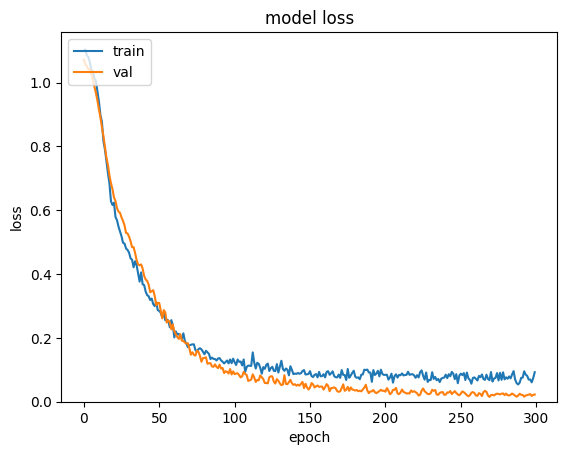

In [ ]:
# Plot loss curves
# objective function changes by task type (we used crossentropy in this one)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(ymin=0)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
# evaluate Keras model
_, accuracy = model.evaluate(X_test, y_test)
print(accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0587
1.0


## What are we looking for?

### Training insights from loss curves (training set)

1. **Slope:** Is the model learning? Loss should be sloping down
1. **Smoothness:** Smooth = learning well, jumpy means something could be wrong in the training
1. **Convergence:** Did it flatten out? (Reach the best learning.) May not be optimal
1. **Avoidable Bias:** If you know how task is completed, you can use it as proxy for best performance. How far is model from the other system doing it?
1. **Generalization:** If test and validation are close, then it's generalizing well.
1. **Overfitting:** Starting to memorize data, loss error begins to increase after flattening out

